In [1]:
## 1. Import modules
import pandas as pd
import openai
from bs4 import BeautifulSoup

In [2]:
## 2. Load data
lessons = pd.read_csv("lessons_with_transcripts.csv",index_col=[0])

In [3]:
lessons

,youtube_id,lessonId,transcripts
0,St53lTNJyVc,6012bdcecfe09249249f7e9c,have you had any food today so what did you e...
1,X2H1Ilg4RWY,6012bdcecfe09249249f7e9c,hello guys you're welcome to class this time ...
2,Nprwc9e71eM,6012d63bcfe09249249f8cb0,[Music] hi do you know that computers are lik...
3,aHhyjIiW1vY,6012d89ccfe09249249f9056,[Music] can you name one food item that is no...
4,zmKTPrnEOUQ,6012d89ccfe09249249f9056,[Music] do you know that apart from the gover...
...,...,...,...
1376,MVcAwL_1wUg,6306390376ceee0016ee8a0d,[Music] our lesson today will be about the cl...
1377,rg70THMWUh4,6306394776ceee0016ee8a1a,[Music] what's your class let's start today o...
1378,fIxuYLUjJ5Q,6306398776ceee0016ee8a27,[Music] good day class today we'll be looking...
1379,cyN6CaYjEuo,630730eb97fb9f0016c4ecd3,[Music] now after a long day faith was exhaus...


In [5]:
lessons.head()

,youtube_id,lessonId,transcripts
0,St53lTNJyVc,6012bdcecfe09249249f7e9c,have you had any food today so what did you e...
1,X2H1Ilg4RWY,6012bdcecfe09249249f7e9c,hello guys you're welcome to class this time ...
2,Nprwc9e71eM,6012d63bcfe09249249f8cb0,[Music] hi do you know that computers are lik...
3,aHhyjIiW1vY,6012d89ccfe09249249f9056,[Music] can you name one food item that is no...
4,zmKTPrnEOUQ,6012d89ccfe09249249f9056,[Music] do you know that apart from the gover...


In [6]:
def get_classes(df):
    lesson_map = pd.read_csv("lessonid_class_map.csv",index_col=[0])
    merged = lesson_map[['lessonId','class_name','title','subject_name']].merge(df,on='lessonId',how='right')
    return merged

In [7]:
lessons_merged= get_classes(lessons)

In [8]:
lessons_merged.head()

,lessonId,class_name,title,subject_name,youtube_id,transcripts
0,6012bdcecfe09249249f7e9c,Primary One,Drawing And Labeling Of Farm Tools,Agricultural Science,St53lTNJyVc,have you had any food today so what did you e...
1,6012bdcecfe09249249f7e9c,Primary One,Drawing And Labeling Of Farm Tools,Agricultural Science,X2H1Ilg4RWY,hello guys you're welcome to class this time ...
2,6012d63bcfe09249249f8cb0,JSS Two,Hardware Components,Computer Science,Nprwc9e71eM,[Music] hi do you know that computers are lik...
3,6012d89ccfe09249249f9056,SSS One,Roles of Government and Non-governmental Organ...,Agricultural Science,aHhyjIiW1vY,[Music] can you name one food item that is no...
4,6012d89ccfe09249249f9056,SSS One,Roles of Government and Non-governmental Organ...,Agricultural Science,zmKTPrnEOUQ,[Music] do you know that apart from the gover...


In [9]:
len(lessons_merged)

1376

In [10]:
lessons_merged['class_name'].unique()

array(['Primary One', 'JSS Two', 'SSS One', nan, 'SSS Two', 'SSS Three',
       'Afrilearn KidsCode'], dtype=object)

In [12]:
lessons_merged.dropna(subset=['class_name'],inplace=True)

In [13]:
classes =lessons_merged['class_name'].unique()

In [14]:
age = 4
class_dictionary = {}

In [15]:
class_dictionary['Primary One'] = 4
class_dictionary['JSS Two'] = 11
class_dictionary['SSS One'] = 13
class_dictionary['SSS Two'] = 14
class_dictionary['SSS Three'] = 15
class_dictionary['Afrilearn KidsCode'] = 10

In [16]:
class_dictionary

{'Primary One': 4,
 'JSS Two': 11,
 'SSS One': 13,
 'SSS Two': 14,
 'SSS Three': 15,
 'Afrilearn KidsCode': 10}

In [17]:
lessons_merged['age'] = lessons_merged['class_name'].apply(lambda x: class_dictionary[x])

In [18]:
lessons_merged.head()

,lessonId,class_name,title,subject_name,youtube_id,transcripts,age
0,6012bdcecfe09249249f7e9c,Primary One,Drawing And Labeling Of Farm Tools,Agricultural Science,St53lTNJyVc,have you had any food today so what did you e...,4
1,6012bdcecfe09249249f7e9c,Primary One,Drawing And Labeling Of Farm Tools,Agricultural Science,X2H1Ilg4RWY,hello guys you're welcome to class this time ...,4
2,6012d63bcfe09249249f8cb0,JSS Two,Hardware Components,Computer Science,Nprwc9e71eM,[Music] hi do you know that computers are lik...,11
3,6012d89ccfe09249249f9056,SSS One,Roles of Government and Non-governmental Organ...,Agricultural Science,aHhyjIiW1vY,[Music] can you name one food item that is no...,13
4,6012d89ccfe09249249f9056,SSS One,Roles of Government and Non-governmental Organ...,Agricultural Science,zmKTPrnEOUQ,[Music] do you know that apart from the gover...,13


In [19]:
lessons_merged.to_csv("lessons_with_transcripts_and_class_age.csv")

In [20]:
lessons_merged.loc[1,'age']

4

## 3. Connect to open AI api

In [21]:
API_KEY = ''
openai.api_key = API_KEY

In [22]:
cc = []

In [25]:
## 4. Define function to get questions
reply_list=[]
lessonid_list = []
youtubeid_list=[]
new_df =[]
reply_format =  "{'question': question,'options':{'a': option 1,'b':option 2,'c':option 3,'d':option 4},'answer': a, 'explantion': simple explanation}"
def get_text(index):
    text = lessons_merged.loc[index,'transcripts']
    text = text.replace("[Music]","")
    return text

def get_age(index):
    age = lessons_merged.loc[index,'age']
    return age

def get_questions(prompt):
    messages = [ {"role": "system", "content": "You are a quiz generator app."} ]
    if prompt:
        messages.append(
            {"role": "user", "content": prompt},
        )
        chat = openai.ChatCompletion.create(
            model="gpt-3.5-turbo", messages=messages,temperature=0
        )
    reply = chat.choices[0].message.content
    return reply

## 5. run functions with prompts

In [40]:
reply_list=[]
lessonid_list = []
youtubeid_list=[]
new_df =[]
reply_format =  "{'question': question,'options':{'a': option 1,'b':option 2,'c':option 3,'d':option 4},'answer': a, 'explantion': simple explanation}"

In [41]:
prompt_format = """
         Create one MEDIUM level difficulty multiple choice question with four options 
         and a fun explanation of the answer for a {} year old 
         from this text delimited in triple backticks ```{}```
         and return your reply as a JSON object in this format ```{}```. 
         Do not add any notes, just return only the JSON object.
        """

In [42]:
for index in range(len(lessons_merged)):
    try:
        print(index)
        lessonid = lessons_merged.loc[index,'lessonId']
        youtubeid = lessons_merged.loc[index,'youtube_id']
        prompt =prompt_format.format(get_age(index),
                              get_text(index),
                              reply_format)
        reply =get_questions(prompt)
        reply_list.append(eval(reply.replace("`","")))
        lessonid_list.append(lessonid)
        youtubeid_list.append(youtubeid)
        new_df = pd.DataFrame(reply_list)
        new_df['lessonId'] = lessonid_list
    except Exception as e:
        print(e)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
invalid syntax (<string>, line 3)
23
24
25
26
27
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID f6355ca20752efee273dbaa8a6f1567a in your message.)
28
29
30
31
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 36fec36935abb7c10fed1a6d37af2761 in your message.)
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID e46f18159518133b6e10f9ff66205eac in your message.)
53
54
55
56
57
58
59
60
61
62
That model is currently overloaded with other req

307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 55f085dbaf78ce9e78ebbd4d76b03577 in your message.)
325
326
327
328
invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
329
330
331
332
333
334
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID fbb840dd42c2eb6f5e6dd651560ff79b in your message.)
335
336
unterminated string literal (detected at line 4) (<string>, line 4)
337
338
339
340
341
342
343
344
345
346
unterminated string literal (detected at line 10) (<string>, line 10)
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
invalid syntax (<string>, line 3)
371
372
373
374
3

1289
unterminated string literal (detected at line 10) (<string>, line 10)
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
unterminated string literal (detected at line 10) (<string>, line 10)
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
unterminated string literal (detected at line 5) (<string>, line 5)
1354
1355
1356
1357
1358
invalid syntax (<string>, line 9)
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373


In [35]:
index = 1340
prompt =prompt_format.format(get_age(index),
                              get_text(index),
                              reply_format)
reply =get_questions(prompt)    

In [36]:
reply

"{'question': 'Who are the Kanuri people?',\n 'options': {'a': 'An African ethnic group living in the land of the former Khanam and Empire in Nigeria, Sudan, Libya, and some other African countries',\n             'b': 'A European ethnic group living in the land of the former Khanam and Empire in Nigeria, Sudan, Libya, and some other African countries',\n             'c': 'An Asian ethnic group living in the land of the former Khanam and Empire in Nigeria, Sudan, Libya, and some other African countries',\n             'd': 'A South American ethnic group living in the land of the former Khanam and Empire in Nigeria, Sudan, Libya, and some other African countries'},\n 'answer': 'a',\n 'explanation': 'The Kanuri people are an African ethnic group living largely in the land of the former Khanam and Empire in Nigeria, Sudan, Libya, and some other African countries. They are known for their language, which was the major language of the Borno Empire. The Kanuri people are also interesting bec

In [37]:
eval(reply)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<string>, line 7)

In [43]:
new_df

,question,options,answer,explanation,lessonId
0,What is agriculture?,"{'a': 'The study of animals', 'b': 'The cultiv...",b,Agriculture is the cultivation of land and pro...,6012bdcecfe09249249f7e9c
1,What do Jasmine and Jasper do to keep their bo...,"{'a': 'They eat a lot of junk food', 'b': 'The...",c,Jasmine and Jasper go to the gym and exercise ...,6012bdcecfe09249249f7e9c
2,Which of the following is NOT an input device ...,"{'a': 'Keyboard', 'b': 'Scanner', 'c': 'Printe...",c,A printer is not an input device for a compute...,6012d63bcfe09249249f8cb0
3,What are some roles of the government in agric...,"{'a': 'Providing basic amenities, farm imputes...",d,The government has several roles in agricultur...,6012d89ccfe09249249f9056
4,What are the roles of NGOs in agricultural dev...,{'a': 'Providing funds for agricultural projec...,d,NGOs play a crucial role in agricultural devel...,6012d89ccfe09249249f9056
...,...,...,...,...,...
1257,"What is the French expression for ""good evening""?","{'a': 'Bonsoir', 'b': 'Bonjour', 'c': 'Salut',...",a,"The French expression for ""good evening"" is ""b...",6306388f76ceee0016ee89f3
1258,"What is the French expression for ""good evening""?","{'a': 'Bonnie', 'b': 'Bonsoir', 'c': 'Au revoi...",b,"In the given text, it is mentioned that ""bonjo...",630638c676ceee0016ee8a00
1259,"What is the French word for ""clean"" in the sen...","{'a': 'Prop', 'b': 'Sal', 'c': 'Eta', 'd': 'La...",a,"In the sentence ""My class is clean"" the French...",6306390376ceee0016ee8a0d
1260,"What does the French verb ""avoir"" mean?","{'a': 'To be', 'b': 'To go', 'c': 'To have', '...",c,"The French verb ""avoir"" means ""to have"". For e...",6306394776ceee0016ee8a1a


In [44]:
new_df['difficulty'] = 'medium'

In [45]:
new_df.to_csv("medium_questions_from transcripts.csv")

In [47]:
df = pd.read_csv("easy_questions_from transcripts.csv",index_col=[0])

In [48]:
df = pd.concat([df,new_df])

In [49]:
df

,question,options,answer,explanation,lessonId,difficulty
0,What is agriculture?,{'a': 'The cultivation of land and production ...,a,Agriculture is when farmers cultivate land and...,6012bdcecfe09249249f7e9c,easy
1,What do Jasmine and Jasper do to keep their bo...,"{'a': 'Go to the movies', 'b': 'Go to the park...",c,Jasmine and Jasper go to the gym to keep their...,6012bdcecfe09249249f7e9c,easy
2,Which of the following is an input device used...,"{'a': 'Keyboard', 'b': 'Mouse', 'c': 'Micropho...",c,A microphone is an input device used to record...,6012d63bcfe09249249f8cb0,easy
3,What are some roles of the government in agric...,{'a': 'Providing basic amenities like water an...,d,The government has several roles in agricultur...,6012d89ccfe09249249f9056,easy
4,What are the roles of NGOs in agricultural dev...,{'a': 'Providing basic amenities like water su...,d,NGOs play a vital role in agricultural develop...,6012d89ccfe09249249f9056,easy
...,...,...,...,...,...,...
1257,"What is the French expression for ""good evening""?","{'a': 'Bonsoir', 'b': 'Bonjour', 'c': 'Salut',...",a,"The French expression for ""good evening"" is ""b...",6306388f76ceee0016ee89f3,medium
1258,"What is the French expression for ""good evening""?","{'a': 'Bonnie', 'b': 'Bonsoir', 'c': 'Au revoi...",b,"In the given text, it is mentioned that ""bonjo...",630638c676ceee0016ee8a00,medium
1259,"What is the French word for ""clean"" in the sen...","{'a': 'Prop', 'b': 'Sal', 'c': 'Eta', 'd': 'La...",a,"In the sentence ""My class is clean"" the French...",6306390376ceee0016ee8a0d,medium
1260,"What does the French verb ""avoir"" mean?","{'a': 'To be', 'b': 'To go', 'c': 'To have', '...",c,"The French verb ""avoir"" means ""to have"". For e...",6306394776ceee0016ee8a1a,medium


In [51]:
new_df['explanation'][1261]

'In French, the word for breakfast is "le repair". This is important to know if you ever visit a French-speaking country and want to order breakfast. Bon appétit!'

In [52]:
get_text(1373)

"  good day class today we'll be looking at some everyday vocabulary and expressions we will also learn to count up to 20 in french let us start with the times of the day le mater le mate which means morning in french la premidi this afternoon in french la premidi the soi is evening in french le soi let's look at the words for days the day's meals in french le repair is breakfast the djna is lunch the dna is dinner in french the expression je fan means i'm hungry je fang an expression je suaf means i'm thirsty jay swaff you can try saying that along with me yes class let's now look at some french words for fruits in french eun orange is an orange in banana is a banana an anana is a pineapple in papaya is a purple in hmong is a mango it is important that you learn how to count in french this will enable you to tell time and also deal with numbers let's begin by looking at the numbers from one to twenty ah is one the is two thr is three is six set is seven wheat is eight nerf is nine dis

In [53]:
prompt = "Update the sentences in this text delimited by triple backticks to be more sensible ```" + get_text(1373) + "```"
get_questions(prompt)

'"Good day, class. Today, we will be learning some everyday vocabulary and expressions in French. We will also learn how to count up to 20 in French. Let\'s start with the times of the day. \'Le matin\' means morning in French. \'L\'après-midi\' means afternoon in French. \'Le soir\' is evening in French. Now, let\'s look at the words for meals of the day. In French, \'le petit déjeuner\' is breakfast, \'le déjeuner\' is lunch, and \'le dîner\' is dinner. In French, the expression \'j\'ai faim\' means \'I\'m hungry\' and \'j\'ai soif\' means \'I\'m thirsty\'. You can try saying that along with me. Now, let\'s learn some French words for fruits. In French, \'une orange\' is an orange, \'une banane\' is a banana, \'un ananas\' is a pineapple, \'une papaye\' is a papaya, and \'une mangue\' is a mango. It is important that you learn how to count in French. This will enable you to tell time and also deal with numbers. Let\'s begin by looking at the numbers from one to twenty. \'Un\' is one,

In [54]:
## Clean transcript

In [55]:
reply_list=[]
lessonid_list = []
youtubeid_list=[]

In [56]:
for index in range(len(lessons_merged)):
    try:
        print(index)
        prompt = "Update the sentences in this text delimited by triple backticks to be more sensible ```" + get_text(index) + "```"
        reply = get_questions(prompt)
        lessonid = lessons_merged.loc[index,'lessonId']
        youtubeid = lessons_merged.loc[index,'youtube_id']
        lessonid_list.append(lessonid)
        youtubeid_list.append(youtubeid)
        reply_list.append(reply)
    except Exception as e:
        print(e)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 3e4533e56c930e4fb1546fe34b7452ed in your message.)
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 4ef60f0ea4346c8b55e1246d99216654 in your message.)
60
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 8141eac1d2861cb24da985acc81d9adc in your message.)
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90

968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID e8cc9d8d73c2e5528d25258584154eae in your message.)
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 8625b8cf7600c40f3400781fd05fe154 in your message.)
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075


In [57]:
reply_list

["```Have you had any food today? What did you eat? Well, I had rice and some fried plantain for breakfast. But have you ever wondered how the food you eat gets to your plate? It all starts on the farm, where farmers cultivate crops like rice and harvest them for consumption. You've probably also eaten eggs before, either fried or boiled. But do you know that eggs come from chickens? When chickens lay eggs, they can be taken for consumption or left to hatch. This is done on a poultry farm. So, the rice farmer and the poultry farmer are both practicing agriculture. But what is agriculture? Agriculture is the cultivation of land and the production of crops, which includes the rearing of animals or livestock for human use. Just imagine what would happen without agriculture. Would there be enough food for us to eat? How about shelter? Would there be chairs for us to sit on? If not for agriculture, we wouldn't have leather made from cow skins, roofs and chests made from trees, or juice made

In [58]:
clean_content=pd.DataFrame(reply_list)

In [59]:
clean_content['lessonId'] = lessonid_list

In [60]:
clean_content['youtube_id'] = youtubeid_list

In [63]:
lessons_merged_with_cleantranscripts= lessons_merged.merge(clean_content,on=['lessonId','youtube_id'],how='inner')

In [65]:
lessons_merged_with_cleantranscripts.rename(columns={0:'clean_transcript'},inplace=True)

In [66]:
reply_list=[]
lessonid_list = []
youtubeid_list=[]
new_df =[]
wrong_question_format_1 = "in the text."
wrong_question_format_2 = "in the next class."
reply_format =  "{'question': question,'options':{'a': option 1,'b':option 2,'c':option 3,'d':option 4},'answer': a, 'explantion': simple explanation}"

In [69]:
## 4. Define function to get questions
def get_text(index):
    text = lessons_merged_with_cleantranscripts.loc[index,'clean_transcript']
    text = text.replace("[Music]","")
    return text

def get_age(index):
    age = lessons_merged_with_cleantranscripts.loc[index,'age']
    return age


def get_old_questions(df,new_df,lessonid):
    old_questions=[]
    old_questions.append(list(df[df['lessonId']==lessonid]['question'].values))
    if len(new_df)>0:
        if lessonid in new_df['lessonId'].values:
            old_questions.append(list(new_df[new_df['lessonId']==lessonid]['question'].values))
    return old_questions

def get_questions(prompt):
    messages = [ {"role": "system", "content": "You are a quiz generator app."} ]
    if prompt:
        messages.append(
            {"role": "user", "content": prompt},
        )
        chat = openai.ChatCompletion.create(
            model="gpt-3.5-turbo", messages=messages,temperature=0
        )
    reply = chat.choices[0].message.content
    return reply

In [70]:
prompt_format = """
         Create one EASY multiple choice question with four options 
         and a funny explanation of the answer for a {} year old 
         from this text delimited in triple backticks ```{}```
         and return your reply as a JSON object in this format ```{}```. 
         This question should not be the same as any question in this list delimited in triple backticks ```{}```.
         Do not add any notes, just return only the JSON object.
         Do not create a question that includes ```{}``` and ```{}```.
         Do not create more than one question.
        """

In [71]:
for index in range(len(lessons_merged_with_cleantranscripts)):
    try:
        print(index)
        lessonid = lessons_merged_with_cleantranscripts.loc[index,'lessonId']
        youtubeid = lessons_merged_with_cleantranscripts.loc[index,'youtube_id']
        prompt =prompt_format.format(get_age(index),
                              get_text(index),
                              reply_format,
                              get_old_questions(df,new_df,lessonid),
                              wrong_question_format_1,
                              wrong_question_format_2)
        reply =get_questions(prompt)
        reply_list.append(eval(reply.replace("`","")))
        lessonid_list.append(lessonid)
        youtubeid_list.append(youtubeid)
        new_df = pd.DataFrame(reply_list)
        new_df['lessonId'] = lessonid_list
    except Exception as e:
        print(e)

0
1
2
3
4
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 65d96144f9a63f408f723e2764a90445 in your message.)
5
6
invalid syntax (<string>, line 3)
7
8
9
unterminated string literal (detected at line 1) (<string>, line 1)
10
11
12
13
invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
14
15
16
17
18
19
20
21
22
23
24
unterminated string literal (detected at line 1) (<string>, line 1)
25
Bad gateway. {"error":{"code":502,"message":"Bad gateway.","param":null,"type":"cf_bad_gateway"}} 502 {'error': {'code': 502, 'message': 'Bad gateway.', 'param': None, 'type': 'cf_bad_gateway'}} {'Date': 'Sat, 27 May 2023 15:30:08 GMT', 'Content-Type': 'application/json', 'Content-Length': '84', 'Connection': 'keep-alive', 'X-Frame-Options': 'SAMEORIGIN', 'Referrer-Policy': 'same-origin', 'Cache-Control': 'private, max-age=0, no-store, no-cache, mus

unterminated string literal (detected at line 1) (<string>, line 1)
431
unterminated string literal (detected at line 1) (<string>, line 1)
432
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 2b22501f5a4ff1db6993a08b3d94dd86 in your message.)
433
434
435
invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
unterminated string literal (detected at line 1) (<string>, line 1)
460
unterminated string literal (detected at line 4) (<string>, line 4)
461
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 41cf883e53feea276a13a2e026b35a97 in your message.)
462
463
464
465
unterminated string literal (dete

914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 4249fa447b44272fbafb719ef73cab82 in your message.)
934
935
936
937
938
939
940
941
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID f18957bd6e67e24a164fd4834ddf625a in your message.)
942
943
944
945
946
947
948
949
950
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID f6346a240ecc2bf507a21137237a9664 in your message.)
951
unterminated string literal (detected at line 1) (<string>, line 1)
952
953
954
955
956
957
958
959
That model

1315
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID f39d069b374a1400a915df2fceae58f6 in your message.)
1316
1317
1318
1319
1320
1321
invalid syntax (<string>, line 3)
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
unterminated string literal (detected at line 1) (<string>, line 1)
1333
unterminated string literal (detected at line 1) (<string>, line 1)
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
unterminated string literal (detected at line 1) (<string>, line 1)
1344
1345
1346
1347
1348
1349
unterminated string literal (detected at line 1) (<string>, line 1)
1350


In [72]:
new_df

,question,options,answer,explanation,lessonId
0,Where do eggs come from?,"{'a': 'Cows', 'b': 'Chickens', 'c': 'Pigs', 'd...",b,"When chickens lay eggs, they can be taken for ...",6012bdcecfe09249249f7e9c
1,What is the name of the app that provides a co...,"{'a': 'RFI Learn app', 'b': 'WhatsApp', 'c': '...",a,"To access a complete curriculum, relevant vide...",6012bdcecfe09249249f7e9c
2,Which of the following input devices is used t...,"{'a': 'Keyboard', 'b': 'Mouse', 'c': 'Scanner'...",d,A joystick is an input device that is often us...,6012d63bcfe09249249f8cb0
3,What basic necessities of life are needed by f...,"{'a': 'Food and water', 'b': 'Electricity and ...",a,Farmers need food and water to survive and tak...,6012d89ccfe09249249f9056
4,What tools did farmers use years ago to farm?,"{'a': 'Tractors and harvesters', 'b': 'Cutlass...",b,"Years ago, farmers had to rely on simple tools...",6012d89ccfe09249249f9058
...,...,...,...,...,...
1177,"What is the French expression for ""good night""?","{'a': 'Bonsoir', 'b': 'Bonne nuit', 'c': 'Au r...",b,"When you want to say ""good night"" in French, y...",6306385a76ceee0016ee89e4
1178,"What is the French expression for ""good mornin...","{'a': 'bonsoir', 'b': 'salut', 'c': 'bonjour',...",c,"In French, the expression ""bonjour"" can mean b...",6306388f76ceee0016ee89f3
1179,"What is the French expression for ""goodbye""?","{'a': 'Bonsoir', 'b': 'Au revoir', 'c': 'Bonne...",b,"In French, ""Au revoir"" means goodbye. It is co...",630638c676ceee0016ee8a00
1180,"What is the French word for ""book""?","{'a': 'Stylo', 'b': 'Crayon', 'c': 'Sac', 'd':...",d,"In French, 'Livre' means 'book.' So if you wan...",6306390376ceee0016ee8a0d


In [75]:
new_df['difficulty'] = 'easy'

In [76]:
new_df.to_csv("easy_questions_withclean.csv")

In [77]:
df = pd.concat([df,new_df])

In [80]:
df.to_csv('all_question_withclean.csv')

In [78]:
reply_list=[]
lessonid_list = []
youtubeid_list=[]
new_df =[]
wrong_question_format_1 = "in the text."
wrong_question_format_2 = "in the next class."
reply_format =  "{'question': question,'options':{'a': option 1,'b':option 2,'c':option 3,'d':option 4},'answer': a, 'explantion': simple explanation}"

In [79]:
prompt_format = """
         Create one HARD level difficulty multiple choice question with four options 
         and a funny explanation of the answer for a {} year old 
         from this text delimited in triple backticks ```{}```
         and return your reply as a JSON object in this format ```{}```. 
         This question should not be the same as any question in this list delimited in triple backticks ```{}```.
         Do not add any notes, just return only the JSON object.
         Do not create a question that includes ```{}``` and ```{}```.
         Do not create more than one question.
        """

In [81]:
for index in range(len(lessons_merged_with_cleantranscripts)):
    try:
        print(index)
        lessonid = lessons_merged_with_cleantranscripts.loc[index,'lessonId']
        youtubeid = lessons_merged_with_cleantranscripts.loc[index,'youtube_id']
        prompt =prompt_format.format(get_age(index),
                              get_text(index),
                              reply_format,
                              get_old_questions(df,new_df,lessonid),
                              wrong_question_format_1,
                              wrong_question_format_2)
        reply =get_questions(prompt)
        reply_list.append(eval(reply.replace("`","")))
        lessonid_list.append(lessonid)
        youtubeid_list.append(youtubeid)
        new_df = pd.DataFrame(reply_list)
        new_df['lessonId'] = lessonid_list
    except Exception as e:
        print(e)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
unterminated string literal (detected at line 1) (<string>, line 1)
25
26
27
28
29
30
31
32
33
34
35
unterminated string literal (detected at line 1) (<string>, line 1)
36
37
38
unterminated string literal (detected at line 1) (<string>, line 1)
39
40
invalid syntax (<string>, line 3)
41
invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
42
43
44
invalid syntax (<string>, line 3)
45
46
47
invalid syntax (<string>, line 13)
48
49
50
51
52
53
54
55
invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
56
57
invalid syntax (<string>, line 6)
58
invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
59
60
61
62
63
64
65
66
67
68
invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
69
70
71
72
73
74
75
76
77
78
79
80
81
82
invalid syntax (<string>, line 6)
83
84
85
86
87
88
89
unterminated string literal (detected at line 4) (<string>, line 4)
90
91
92
93
94
95
invalid syntax (<string>, l

485
486
487
488
489
490
491
492
493
494
495
invalid syntax (<string>, line 3)
496
497
498
invalid syntax (<string>, line 3)
499
500
501
502
503
unterminated string literal (detected at line 1) (<string>, line 1)
504
505
506
507
508
unterminated string literal (detected at line 1) (<string>, line 1)
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
invalid syntax (<string>, line 3)
568
569
570
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 5749f66921093f3c57f1a9cf11c04ec5 in your message.)
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
That model is currently overloaded with other requests. You can retry your request, 

1102
1103
1104
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID b9c5b6ea471f8d304713eee4fdb5c0a3 in your message.)
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 7ddec365ff9d47ec091524fee745ad95 in your message.)
1128
1129
1130
1131
1132
1133
invalid syntax. Perhaps you forgot a comma? (<string>, line 10)
1134
1135
1136
1137
1138
1139
unterminated string literal (detected at line 4) (<string>, line 4)
1140
1141
1142
1143
unterminated string literal (detected at line 1) (<string>, line 1)
1144
unterminated string literal (detected at line 1) (<string>, line 1)
1145
unterminated string 

In [82]:
new_df['difficulty'] = 'hard'

In [83]:
new_df.to_csv("hard_questions_withclean.csv")

In [84]:
df = pd.concat([df,new_df])

In [85]:
df.to_csv('all_question_withclean.csv')

In [86]:
reply_list=[]
lessonid_list = []
youtubeid_list=[]
new_df =[]
wrong_question_format_1 = "in the text."
wrong_question_format_2 = "in the next class."
reply_format =  "{'question': question,'options':{'a': option 1,'b':option 2,'c':option 3,'d':option 4},'answer': a, 'explantion': simple explanation}"

In [87]:
prompt_format = """
         Create one MEDIUM level difficulty multiple choice question with four options 
         and a funny explanation of the answer for a {} year old 
         from this text delimited in triple backticks ```{}```
         and return your reply as a JSON object in this format ```{}```. 
         This question should not be the same as any question in this list delimited in triple backticks ```{}```.
         Do not add any notes, just return only the JSON object.
         Do not create a question that includes ```{}``` and ```{}```.
         Do not create more than one question.
        """

In [91]:
for index in range(len(lessons_merged_with_cleantranscripts)):
    try:
        print(index)
        lessonid = lessons_merged_with_cleantranscripts.loc[index,'lessonId']
        youtubeid = lessons_merged_with_cleantranscripts.loc[index,'youtube_id']
        prompt =prompt_format.format(get_age(index),
                              get_text(index),
                              reply_format,
                              get_old_questions(df,new_df,lessonid),
                              wrong_question_format_1,
                              wrong_question_format_2)
        reply =get_questions(prompt)
        reply_list.append(eval(reply.replace("`","")))
        lessonid_list.append(lessonid)
        youtubeid_list.append(youtubeid)
        new_df = pd.DataFrame(reply_list)
        new_df['lessonId'] = lessonid_list
    except Exception as e:
        print(e)

0
1
2
3
4
5
invalid syntax (<string>, line 3)
6
unterminated string literal (detected at line 3) (<string>, line 3)
7
invalid syntax (<string>, line 3)
8
9
10
11
12
13
invalid syntax (<string>, line 3)
14
unterminated string literal (detected at line 1) (<string>, line 1)
15
16
unterminated string literal (detected at line 1) (<string>, line 1)
17
18
19
20
21
unterminated string literal (detected at line 1) (<string>, line 1)
22
23
24
25
26
unterminated string literal (detected at line 1) (<string>, line 1)
27
28
29
30
31
32
33
name 'd' is not defined
34
35
36
unterminated string literal (detected at line 1) (<string>, line 1)
37
38
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 752fb8ce9917afd7c5a54c243c99ffbc in your message.)
39
unterminated string literal (detected at line 1) (<string>, line 1)
40
41
42
43
44
unterminated string literal

524
525
526
527
528
529
530
531
unterminated string literal (detected at line 1) (<string>, line 1)
532
533
534
535
536
537
538
unterminated string literal (detected at line 1) (<string>, line 1)
539
540
unterminated string literal (detected at line 1) (<string>, line 1)
541
542
543
544
545
invalid syntax (<string>, line 3)
546
547
548
549
550
unterminated string literal (detected at line 1) (<string>, line 1)
551
552
553
554
555
556
557
558
invalid syntax (<string>, line 3)
559
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID b0be7da566a119caaabb97284e10eb87 in your message.)
560
unterminated string literal (detected at line 1) (<string>, line 1)
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
invalid syntax. Perhaps you forgot a comma? (<string>, line 10)
585
586
unterminated string literal (d

1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
unterminated string literal (detected at line 1) (<string>, line 1)
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 5a1ecb12beb03a343c4edcf5a3d5635b in your message.)
1029
1030
1031
unterminated string literal (detected at line 1) (<string>, line 1)
1032
invalid syntax (<string>, line 3)
1033
1034
1035
1036
1037
1038
1039
invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
1040
1041
1042
1043
1044
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID c7cd36592a17135d5c3501231a3709b5 in your message.)
1045
1046
unterminated string literal (detected at line 3) (

In [88]:
len(df)

4828

In [90]:
df['difficulty'].value_counts()

easy      2371
medium    1262
hard      1195
Name: difficulty, dtype: int64

In [92]:
new_df['difficulty'] = 'medium'

In [93]:
new_df.to_csv("mediumv2_questions_withclean.csv")

In [94]:
df = pd.concat([df,new_df])

In [95]:
df.to_csv('all_question_withclean.csv')

In [96]:
reply_list=[]
lessonid_list = []
youtubeid_list=[]
new_df =[]
wrong_question_format_1 = "in the text."
wrong_question_format_2 = "in the next class."
reply_format =  "{'question': question,'options':{'a': option 1,'b':option 2,'c':option 3,'d':option 4},'answer': a, 'explantion': simple explanation}"

In [97]:
prompt_format = """
         Create one HARD level difficulty multiple choice question with four options 
         and a funny explanation of the answer for a {} year old 
         from this text delimited in triple backticks ```{}```
         and return your reply as a JSON object in this format ```{}```. 
         This question should not be the same as any question in this list delimited in triple backticks ```{}```.
         Do not add any notes, just return only the JSON object.
         Do not create a question that includes ```{}``` and ```{}```.
         Do not create more than one question.
        """

In [98]:
for index in range(len(lessons_merged_with_cleantranscripts)):
    try:
        print(index)
        lessonid = lessons_merged_with_cleantranscripts.loc[index,'lessonId']
        youtubeid = lessons_merged_with_cleantranscripts.loc[index,'youtube_id']
        prompt =prompt_format.format(get_age(index),
                              get_text(index),
                              reply_format,
                              get_old_questions(df,new_df,lessonid),
                              wrong_question_format_1,
                              wrong_question_format_2)
        reply =get_questions(prompt)
        reply_list.append(eval(reply.replace("`","")))
        lessonid_list.append(lessonid)
        youtubeid_list.append(youtubeid)
        new_df = pd.DataFrame(reply_list)
        new_df['lessonId'] = lessonid_list
    except Exception as e:
        print(e)

0
1
2
3
4
5
6
invalid syntax (<string>, line 3)
7
invalid syntax (<string>, line 3)
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 2f75d2bc6caf3d2f219ff307b7f26451 in your message.)
32
33
34
35
36
unterminated string literal (detected at line 1) (<string>, line 1)
37
38
unterminated string literal (detected at line 1) (<string>, line 1)
39
invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
40
unterminated string literal (detected at line 3) (<string>, line 3)
41
42
43
44
invalid syntax (<string>, line 3)
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID da21987b25a

440
441
442
443
444
445
446
447
448
449
450
invalid syntax (<string>, line 3)
451
452
453
454
455
456
457
458
459
unterminated string literal (detected at line 1) (<string>, line 1)
460
461
462
463
464
465
466
467
468
469
unterminated string literal (detected at line 1) (<string>, line 1)
470
471
472
473
474
475
476
477
478
479
480
481
482
483
invalid syntax (<string>, line 8)
484
485
486
487
488
489
490
491
492
493
494
495
invalid syntax (<string>, line 3)
496
invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
497
498
499
500
501
name 'd' is not defined
502
503
invalid syntax (<string>, line 3)
504
505
invalid syntax (<string>, line 3)
506
507
508
unterminated string literal (detected at line 1) (<string>, line 1)
509
510
511
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 2475efde806b116354169b43e08abdee in your message.)
512
5

1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 31d878d1707ce452f899ee6a36322f55 in your message.)
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
invalid syntax (<string>, line 3)
1136
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 1a63868cc484db085486f3da9d0c62cf in your message.)
1137
1138
1139
1140
That model is currently overloaded with other requests. You

In [99]:
new_df

,question,options,answer,explanation,lessonId
0,What is agriculture?,{'a': 'The process of making clothes from cott...,b,Agriculture is the process of cultivating land...,6012bdcecfe09249249f7e9c
1,What is the name of the app that provides a co...,"{'a': 'RFI Learn app', 'b': 'Google Play', 'c'...",a,"The app that provides a complete curriculum, r...",6012bdcecfe09249249f7e9c
2,Which of the following input devices is used t...,"{'a': 'Keyboard', 'b': 'Mouse', 'c': 'Scanner'...",d,The pen tablet is an input device that capture...,6012d63bcfe09249249f8cb0
3,What is the name of the educational programs t...,"{'a': 'Agricultural programs', 'b': 'Basic ame...",a,The government could establish all kinds of ed...,6012d89ccfe09249249f9056
4,What do NGOs provide to rural farmers in terms...,"{'a': 'Fertilizers and herbicides', 'b': 'Basi...",c,NGOs provide irrigation and drainage to make y...,6012d89ccfe09249249f9056
...,...,...,...,...,...
1192,"What does ""L'homme est beau"" mean in English?","{'a': 'The man is tall', 'b': 'The man is hand...",b,"In the French lesson, we learned that ""L'homme...",630637c876ceee0016ee89ca
1193,"What is the French expression for ""How are you?""","{'a': 'Comment ça va?', 'b': 'Bonsoir', 'c': '...",a,"In French, ""Comment ça va?"" is the expression ...",6306385a76ceee0016ee89e4
1194,"What is the French word for ""bag""?","{'a': 'Stylo', 'b': 'Crayon', 'c': 'Sac', 'd':...",c,In the vocabulary of objects you may find in a...,6306390376ceee0016ee8a0d
1195,"What is the French word for ""afternoon""?","{'a': 'le matin', 'b': 'l'après-midi', 'c': 'l...",b,"In the given text, the French word for 'aftern...",6306394776ceee0016ee8a1a


In [102]:
new_df['difficulty'] = 'hard'

In [103]:
df=pd.concat([df,new_df])

In [105]:
df['difficulty'].value_counts()

medium    2416
hard      2392
easy      2371
Name: difficulty, dtype: int64

In [106]:
df.reset_index(inplace=True)

In [125]:
df = df.drop('index',axis=1)

In [126]:
df.to_csv('all_question_withclean.csv',index=[0])

In [108]:
## combine all questions

In [109]:
previous = pd.read_csv("latest_questions.csv",index_col=[0])

In [113]:
previous['difficulty'] = previous['difficulty'].fillna("hard")

In [127]:
combined = pd.concat([previous,df])

In [128]:
combined['difficulty'].value_counts()

hard      4857
medium    4829
easy      3820
Name: difficulty, dtype: int64

In [129]:
combined

,question,options,answer,explanation,lessonId,difficulty
0,What is a cutlass used for on the farm?,"{'a': 'cutting wood', 'b': 'removing weeds', '...",a,A cutlass is a farm tool used for cutting wood...,6012bdcecfe09249249f7e9c,easy
1,What is a shovel used for on the farm?,"{'a': 'Lifting soil and weeding', 'b': 'Cuttin...",a,A shovel is a farm tool used for lifting soil ...,6012bdcecfe09249249f7e9c,easy
2,What are the three parts that make up an insec...,"{'a': 'Head, thorax, and abdomen', 'b': 'Head,...",a,"Just like how we have a head, chest, and stoma...",6012bdcecfe09249249f7e9e,easy
3,What do we call small creatures with six legs ...,"{'a': 'Birds', 'b': 'Fish', 'c': 'Insects', 'd...",c,Insects are small creatures with six legs and ...,6012bdcecfe09249249f7e9e,easy
4,Which of the following is a harmful insect?,"{'a': 'Butterfly', 'b': 'Beetle', 'c': 'Bee', ...",b,Beetles are harmful insects because they destr...,6012bdcecfe09249249f7ea0,easy
...,...,...,...,...,...,...
7174,"What does ""L'homme est beau"" mean in English?","{'a': 'The man is tall', 'b': 'The man is hand...",b,"In the French lesson, we learned that ""L'homme...",630637c876ceee0016ee89ca,hard
7175,"What is the French expression for ""How are you?""","{'a': 'Comment ça va?', 'b': 'Bonsoir', 'c': '...",a,"In French, ""Comment ça va?"" is the expression ...",6306385a76ceee0016ee89e4,hard
7176,"What is the French word for ""bag""?","{'a': 'Stylo', 'b': 'Crayon', 'c': 'Sac', 'd':...",c,In the vocabulary of objects you may find in a...,6306390376ceee0016ee8a0d,hard
7177,"What is the French word for ""afternoon""?","{'a': 'le matin', 'b': 'l'après-midi', 'c': 'l...",b,"In the given text, the French word for 'aftern...",6306394776ceee0016ee8a1a,hard


In [119]:
def get_classes(df):
    lesson_map = pd.read_csv("lessonid_class_map.csv",index_col=[0])
    merged = lesson_map[['lessonId','class_name','title','subject_name']].merge(df,on='lessonId',how='right')
    return merged

In [131]:
combined = get_classes(combined)

In [132]:
import seaborn as sns

In [139]:
sns.set(rc={'figure.figsize':(14,8.27)})

<AxesSubplot: xlabel='class_name', ylabel='count'>

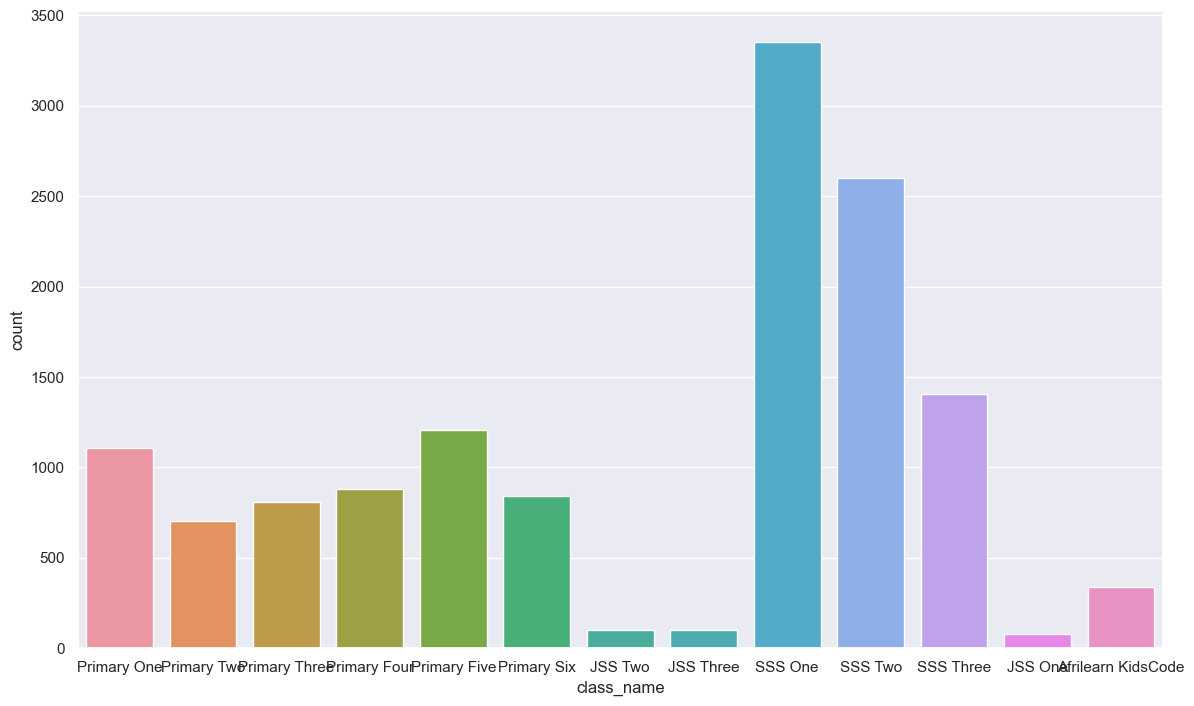

In [140]:
sns.countplot(data=combined,x='class_name')

In [136]:
combined['class_name'].value_counts()

SSS One               3355
SSS Two               2598
SSS Three             1403
Primary Five          1205
Primary One           1107
Primary Four           881
Primary Six            839
Primary Three          806
Primary Two            702
Afrilearn KidsCode     337
JSS Two                100
JSS Three               98
JSS One                 75
Name: class_name, dtype: int64

In [142]:
lessons_merged

,lessonId,class_name,title,subject_name,youtube_id,transcripts,age
0,6012bdcecfe09249249f7e9c,Primary One,Drawing And Labeling Of Farm Tools,Agricultural Science,St53lTNJyVc,have you had any food today so what did you e...,4
1,6012bdcecfe09249249f7e9c,Primary One,Drawing And Labeling Of Farm Tools,Agricultural Science,X2H1Ilg4RWY,hello guys you're welcome to class this time ...,4
2,6012d63bcfe09249249f8cb0,JSS Two,Hardware Components,Computer Science,Nprwc9e71eM,[Music] hi do you know that computers are lik...,11
3,6012d89ccfe09249249f9056,SSS One,Roles of Government and Non-governmental Organ...,Agricultural Science,aHhyjIiW1vY,[Music] can you name one food item that is no...,13
4,6012d89ccfe09249249f9056,SSS One,Roles of Government and Non-governmental Organ...,Agricultural Science,zmKTPrnEOUQ,[Music] do you know that apart from the gover...,13
...,...,...,...,...,...,...,...
1371,6306390376ceee0016ee8a0d,SSS One,The Classroom,French Language,MVcAwL_1wUg,[Music] our lesson today will be about the cl...,13
1372,6306394776ceee0016ee8a1a,SSS One,Verbs,French Language,rg70THMWUh4,[Music] what's your class let's start today o...,13
1373,6306398776ceee0016ee8a27,SSS One,Vocabulary,French Language,fIxuYLUjJ5Q,[Music] good day class today we'll be looking...,13
1374,630730eb97fb9f0016c4ecd3,SSS One,Chemical Reactions,Physics,cyN6CaYjEuo,[Music] now after a long day faith was exhaus...,13


In [147]:
lessons_for_jss= lesson_map[lesson_map['class_name'].isin(['JSS One','JSS Two','JSS Three'])]

In [149]:
lessons_for_jss.head(50)

,subjectId,mainSubjectId,courseId,imageUrl,createdAt,updatedAt,subject_name,introText,classification,class_name,lessonId,views,termId,videoUrls,title,content
1330,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec2cfe09249249f88fe,395.0,5fc8d1b20fae0a06bc22db5c,"[{'_id': ObjectId('60f57e1f70098500154499c5'),...",Meaning and Importance of Agriculture,"<p class=""content"">&nbsp;<em><strong>Welcome t..."
1331,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec2cfe09249249f8900,52.0,5fc8d1b20fae0a06bc22db5c,"[{'_id': ObjectId('60df26326761520015243f12'),...",Forms or Branches of Agriculture,<p><em><strong>Welcome to class!</strong></em>...
1332,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec2cfe09249249f8902,68.0,5fc8d1b20fae0a06bc22db5c,"[{'_id': ObjectId('607e790b254cf60015687d08'),...",Types Of Agriculture,<p><em><strong>Welcome to class!</strong></em>...
1333,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec2cfe09249249f8904,25.0,5fc8d1b20fae0a06bc22db5c,"[{'_id': ObjectId('60df28016761520015243f13'),...",Branches Of Agriculture,<p><em><strong>Welcome to class!</strong></em>...
1334,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec2cfe09249249f8906,29.0,5fc8d1b20fae0a06bc22db5c,"[{'_id': ObjectId('60e419bf5591330015d898a7'),...",Crops Plant Form,<p><em><strong>Welcome to class!</strong></em>...
1335,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec2cfe09249249f8908,20.0,5fc8d1b20fae0a06bc22db5c,[],Crops Plant Form II,<p><em><strong>Welcome to class!</strong></em>...
1336,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec6cfe09249249f890c,29.0,600047f67cabf80f88f61735,[],Characteristics of Selected Farm Animals,"<p>Welcome to class!</p><p>In today’s class, w..."
1337,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec6cfe09249249f890e,17.0,600047f67cabf80f88f61735,[],Importance of Farm Animals,<p><em><strong>Welcome to class!</strong></em>...
1338,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec6cfe09249249f8910,109.0,600047f67cabf80f88f61735,[],Method of Weed and Pest Control,<p><em><strong>Welcome to class!</strong></em>...
1339,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec6cfe09249249f8912,11.0,600047f67cabf80f88f61735,[],Classification of Crops,<p><em><strong>Welcome to class!</strong></em>...


In [156]:
lessons_for_jss_nourl=lessons_for_jss[lessons_for_jss['videoUrls'].str.len()==2]

In [157]:
lessons_for_jss_nourl

,subjectId,mainSubjectId,courseId,imageUrl,createdAt,updatedAt,subject_name,introText,classification,class_name,lessonId,views,termId,videoUrls,title,content
1335,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec2cfe09249249f8908,20.0,5fc8d1b20fae0a06bc22db5c,[],Crops Plant Form II,<p><em><strong>Welcome to class!</strong></em>...
1336,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec6cfe09249249f890c,29.0,600047f67cabf80f88f61735,[],Characteristics of Selected Farm Animals,"<p>Welcome to class!</p><p>In today’s class, w..."
1337,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec6cfe09249249f890e,17.0,600047f67cabf80f88f61735,[],Importance of Farm Animals,<p><em><strong>Welcome to class!</strong></em>...
1338,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec6cfe09249249f8910,109.0,600047f67cabf80f88f61735,[],Method of Weed and Pest Control,<p><em><strong>Welcome to class!</strong></em>...
1339,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec6cfe09249249f8912,11.0,600047f67cabf80f88f61735,[],Classification of Crops,<p><em><strong>Welcome to class!</strong></em>...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,60119bce31c66a2ebd9eb4f4,5ffef70cde0bdb47f826fea6,5fff734ade0bdb47f826feb1,NaN,NaN,NaN,Physical Health Education,"In this Class, you will learn all Physical Edu...",Languages,JSS Three,6012d83ccfe09249249f9028,12.0,600048197cabf80f88f61736,[],Pole Vault Skills,<h3></h3>\r\n<em><strong>Welcome to class! </s...
2338,60119bce31c66a2ebd9eb4f4,5ffef70cde0bdb47f826fea6,5fff734ade0bdb47f826feb1,NaN,NaN,NaN,Physical Health Education,"In this Class, you will learn all Physical Edu...",Languages,JSS Three,6012d83ccfe09249249f902a,2.0,600048197cabf80f88f61736,[],Swimming,<h3></h3>\r\n<em><strong>Welcome to class! </s...
2339,60119bce31c66a2ebd9eb4f4,5ffef70cde0bdb47f826fea6,5fff734ade0bdb47f826feb1,NaN,NaN,NaN,Physical Health Education,"In this Class, you will learn all Physical Edu...",Languages,JSS Three,6012d83ccfe09249249f902c,7.0,600048197cabf80f88f61736,[],"Recreation, Leisure and Dance Activities",&nbsp;\r\n\r\n<em><strong>Welcome to class! </...
2340,60119bce31c66a2ebd9eb4f4,5ffef70cde0bdb47f826fea6,5fff734ade0bdb47f826feb1,NaN,NaN,NaN,Physical Health Education,"In this Class, you will learn all Physical Edu...",Languages,JSS Three,6012d83ccfe09249249f9020,11.0,600048197cabf80f88f61736,[],Family Life Education,&nbsp;\r\n\r\n<em><strong>Welcome to class! </...


In [169]:
## 4. Define function to get questions
def get_text(lesson_df,index):
    g = BeautifulSoup(lesson_df.loc[index,'content'])
    contents =g.get_text().replace("\\\\n","").replace("\\\\t","").replace("\r\n","").replace("\n","")
    return contents

def get_age(lesson_df,index):
    age = lesson_df.loc[index,'age']
    return age

def get_old_questions(df,new_df,lessonid):
    old_questions=[]
    old_questions.append(list(df[df['lessonId']==lessonid]['question'].values))
    if len(new_df)>0:
        if lessonid in new_df['lessonId'].values:
            old_questions.append(list(new_df[new_df['lessonId']==lessonid]['question'].values))
    return old_questions

def get_questions(prompt):
    messages = [ {"role": "system", "content": "You are a quiz generator app."} ]
    if prompt:
        messages.append(
            {"role": "user", "content": prompt},
        )
        chat = openai.ChatCompletion.create(
            model="gpt-3.5-turbo", messages=messages,temperature=0
        )
    reply = chat.choices[0].message.content
    return reply

In [172]:
len(lessons_for_jss)

1012

In [171]:
get_text(lessons_for_jss,1335)

"Welcome to class!In today’s class, we will be talking more about crops' plant form. Enjoy the class!Classification of Crops based on Life Span (Annual, Biennial, Perennial Crop)Crops complete their processes of growth at different lengths of time. Hence, crops can be classified as follows - annual, biennial, and perennial.Annual Crops (e.g. maize, yam, etc.)Biennial Crops (e.g. ginger, pineapple, cassava, etc)Perennial Crops (e.g cocoa, mango, etc.)I will be explaining them for more understanding;Annual Crop:Annual crops are crops that complete their life cycle (length of life) within one year or in one growing season. These crops grow into maturity, flower, produce seeds, and eventually die within one year. Annuals are plants that complete their life cycle in one year. They germinate, grow, bear fruits and die off within a year. Generally, all herbs and plants belonging to the grass family exhibit this type of life cycle. Examples are maize, rice, sorghum, soya beans, guinea corn, co

In [173]:
prompt_format = """
         Create one EASY multiple choice question with four options 
         and a funny explanation of the answer for a {} year old 
         from this text delimited in triple backticks ```{}```
         and return your reply as a JSON object in this format ```{}```. 
         This question should not be the same as any question in this list delimited in triple backticks ```{}```.
         Do not add any notes, just return only the JSON object.
         Do not create a question that includes ```{}``` and ```{}```.
         Do not create more than one question.
        """

In [174]:
lessons_for_jss

,subjectId,mainSubjectId,courseId,imageUrl,createdAt,updatedAt,subject_name,introText,classification,class_name,lessonId,views,termId,videoUrls,title,content
1330,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec2cfe09249249f88fe,395.0,5fc8d1b20fae0a06bc22db5c,"[{'_id': ObjectId('60f57e1f70098500154499c5'),...",Meaning and Importance of Agriculture,"<p class=""content"">&nbsp;<em><strong>Welcome t..."
1331,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec2cfe09249249f8900,52.0,5fc8d1b20fae0a06bc22db5c,"[{'_id': ObjectId('60df26326761520015243f12'),...",Forms or Branches of Agriculture,<p><em><strong>Welcome to class!</strong></em>...
1332,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec2cfe09249249f8902,68.0,5fc8d1b20fae0a06bc22db5c,"[{'_id': ObjectId('607e790b254cf60015687d08'),...",Types Of Agriculture,<p><em><strong>Welcome to class!</strong></em>...
1333,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec2cfe09249249f8904,25.0,5fc8d1b20fae0a06bc22db5c,"[{'_id': ObjectId('60df28016761520015243f13'),...",Branches Of Agriculture,<p><em><strong>Welcome to class!</strong></em>...
1334,60119a3331c66a2ebd9eb4cf,60115b97f05815325d1a9dfb,5fff72b3de0bdb47f826feaf,NaN,NaN,NaN,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,JSS One,6012cec2cfe09249249f8906,29.0,5fc8d1b20fae0a06bc22db5c,"[{'_id': ObjectId('60e419bf5591330015d898a7'),...",Crops Plant Form,<p><em><strong>Welcome to class!</strong></em>...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,60119bce31c66a2ebd9eb4f4,5ffef70cde0bdb47f826fea6,5fff734ade0bdb47f826feb1,NaN,NaN,NaN,Physical Health Education,"In this Class, you will learn all Physical Edu...",Languages,JSS Three,6012d83ccfe09249249f9028,12.0,600048197cabf80f88f61736,[],Pole Vault Skills,<h3></h3>\r\n<em><strong>Welcome to class! </s...
2338,60119bce31c66a2ebd9eb4f4,5ffef70cde0bdb47f826fea6,5fff734ade0bdb47f826feb1,NaN,NaN,NaN,Physical Health Education,"In this Class, you will learn all Physical Edu...",Languages,JSS Three,6012d83ccfe09249249f902a,2.0,600048197cabf80f88f61736,[],Swimming,<h3></h3>\r\n<em><strong>Welcome to class! </s...
2339,60119bce31c66a2ebd9eb4f4,5ffef70cde0bdb47f826fea6,5fff734ade0bdb47f826feb1,NaN,NaN,NaN,Physical Health Education,"In this Class, you will learn all Physical Edu...",Languages,JSS Three,6012d83ccfe09249249f902c,7.0,600048197cabf80f88f61736,[],"Recreation, Leisure and Dance Activities",&nbsp;\r\n\r\n<em><strong>Welcome to class! </...
2340,60119bce31c66a2ebd9eb4f4,5ffef70cde0bdb47f826fea6,5fff734ade0bdb47f826feb1,NaN,NaN,NaN,Physical Health Education,"In this Class, you will learn all Physical Edu...",Languages,JSS Three,6012d83ccfe09249249f9020,11.0,600048197cabf80f88f61736,[],Family Life Education,&nbsp;\r\n\r\n<em><strong>Welcome to class! </...


In [175]:
class_dictionary = {}
class_dictionary['JSS One'] = 10
class_dictionary['JSS Two'] = 11
class_dictionary['JSS Three'] = 12

In [176]:
lessons_for_jss['age'] = lessons_for_jss['class_name'].apply(lambda x: class_dictionary[x])

C:\Users\aloag\AppData\Local\Temp\ipykernel_14000\2091435657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lessons_for_jss['age'] = lessons_for_jss['class_name'].apply(lambda x: class_dictionary[x])


combined

In [177]:
combined

,lessonId,class_name,title,subject_name,question,options,answer,explanation,difficulty
0,6012bdcecfe09249249f7e9c,Primary One,Drawing And Labeling Of Farm Tools,Agricultural Science,What is a cutlass used for on the farm?,"{'a': 'cutting wood', 'b': 'removing weeds', '...",a,A cutlass is a farm tool used for cutting wood...,easy
1,6012bdcecfe09249249f7e9c,Primary One,Drawing And Labeling Of Farm Tools,Agricultural Science,What is a shovel used for on the farm?,"{'a': 'Lifting soil and weeding', 'b': 'Cuttin...",a,A shovel is a farm tool used for lifting soil ...,easy
2,6012bdcecfe09249249f7e9e,Primary One,Types Of Insect And Part (Cockroach),Agricultural Science,What are the three parts that make up an insec...,"{'a': 'Head, thorax, and abdomen', 'b': 'Head,...",a,"Just like how we have a head, chest, and stoma...",easy
3,6012bdcecfe09249249f7e9e,Primary One,Types Of Insect And Part (Cockroach),Agricultural Science,What do we call small creatures with six legs ...,"{'a': 'Birds', 'b': 'Fish', 'c': 'Insects', 'd...",c,Insects are small creatures with six legs and ...,easy
4,6012bdcecfe09249249f7ea0,Primary One,Useful And Harmful Insect,Agricultural Science,Which of the following is a harmful insect?,"{'a': 'Butterfly', 'b': 'Beetle', 'c': 'Bee', ...",b,Beetles are harmful insects because they destr...,easy
...,...,...,...,...,...,...,...,...,...
13501,630637c876ceee0016ee89ca,SSS One,Parts of the Body,French Language,"What does ""L'homme est beau"" mean in English?","{'a': 'The man is tall', 'b': 'The man is hand...",b,"In the French lesson, we learned that ""L'homme...",hard
13502,6306385a76ceee0016ee89e4,SSS One,Salutation I,French Language,"What is the French expression for ""How are you?""","{'a': 'Comment ça va?', 'b': 'Bonsoir', 'c': '...",a,"In French, ""Comment ça va?"" is the expression ...",hard
13503,6306390376ceee0016ee8a0d,SSS One,The Classroom,French Language,"What is the French word for ""bag""?","{'a': 'Stylo', 'b': 'Crayon', 'c': 'Sac', 'd':...",c,In the vocabulary of objects you may find in a...,hard
13504,6306394776ceee0016ee8a1a,SSS One,Verbs,French Language,"What is the French word for ""afternoon""?","{'a': 'le matin', 'b': 'l'après-midi', 'c': 'l...",b,"In the given text, the French word for 'aftern...",hard


In [179]:
lessons_for_jss.reset_index(inplace=True,drop=True)

In [181]:
reply_list=[]
lessonid_list = []
new_df =[]
reply_format =  "{'question': question,'options':{'a': option 1,'b':option 2,'c':option 3,'d':option 4},'answer': a, 'explantion': simple explanation}"
wrong_question_format_1 = "in the text."
wrong_question_format_2 = "in the next class."

In [182]:
for index in range(len(lessons_for_jss)):
    try:
        print(index)
        lessonid = lessons_for_jss.loc[index,'lessonId']
        prompt =prompt_format.format(get_age(lessons_for_jss,index),
                              get_text(lessons_for_jss,index),
                              reply_format,
                              get_old_questions(old_df,new_df,lessonid),
                              wrong_question_format_1,
                              wrong_question_format_2)
        reply =get_questions(prompt)
        reply_list.append(eval(reply.replace("`","")))
        lessonid_list.append(lessonid)
        new_df = pd.DataFrame(reply_list)
        new_df['lessonId'] = lessonid_list
    except Exception as e:
        print(e)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
unterminated string literal (detected at line 1) (<string>, line 1)
17
18
19
unterminated string literal (detected at line 1) (<string>, line 1)
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
unterminated string literal (detected at line 1) (<string>, line 1)
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
unterminated string literal (detected at line 1) (<string>, line 1)
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177


884
885
886
887
888
889
890
891
892
893
894
895
896
897
unterminated string literal (detected at line 10) (<string>, line 10)
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
unterminated string literal (detected at line 1) (<string>, line 1)
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
unterminated string literal (detected at line 1) (<string>, line 1)
975
name 'c' is not defined
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011


In [183]:
new_df

,question,options,answer,explanation,lessonId
0,What is the meaning of the word Agriculture?,{'a': 'The art and science of cultivating soil...,a,Agriculture is derived from two Latin words ‘A...,6012cec2cfe09249249f88fe
1,Which branch of Agriculture deals with the rea...,"{'a': 'Horticulture', 'b': 'Fishery', 'c': 'Ap...",c,Apiculture is the branch of agriculture that d...,6012cec2cfe09249249f8900
2,What is subsistence agriculture?,{'a': 'Large-scale production of crops for sal...,b,Subsistence agriculture is the type of agricul...,6012cec2cfe09249249f8902
3,Which branch of agriculture deals with the pro...,"{'a': 'Agronomy', 'b': 'Horticulture', 'c': 'F...",b,Horticulture deals with the production of frui...,6012cec2cfe09249249f8904
4,Which of the following is NOT a classification...,"{'a': 'Fruit Crops', 'b': 'Fibre Crops', 'c': ...",a,Fruit crops are a classification of crops base...,6012cec2cfe09249249f8906
...,...,...,...,...,...
954,What is pole-vaulting?,{'a': 'A track and field event where a person ...,a,Pole-vaulting is a track and field event in wh...,6012d83ccfe09249249f9028
955,Which swimming style is also known as freestyl...,"{'a': 'Backstroke', 'b': 'Butterfly', 'c': 'Br...",d,Front crawl is also known as freestyle stroke....,6012d83ccfe09249249f902a
956,What is the name of the traditional dance from...,"{'a': 'Bata', 'b': 'Agidigbo', 'c': 'Sharo', '...",d,Atilogwu is a traditional dance from the Igbo ...,6012d83ccfe09249249f902c
957,What is a nuclear family?,{'a': 'A family consisting of a stepfather or ...,d,A nuclear family is a traditional family struc...,6012d83ccfe09249249f9020


In [185]:
combined = pd.concat([combined,new_df])

In [186]:
combined

,lessonId,class_name,title,subject_name,question,options,answer,explanation,difficulty
0,6012bdcecfe09249249f7e9c,Primary One,Drawing And Labeling Of Farm Tools,Agricultural Science,What is a cutlass used for on the farm?,"{'a': 'cutting wood', 'b': 'removing weeds', '...",a,A cutlass is a farm tool used for cutting wood...,easy
1,6012bdcecfe09249249f7e9c,Primary One,Drawing And Labeling Of Farm Tools,Agricultural Science,What is a shovel used for on the farm?,"{'a': 'Lifting soil and weeding', 'b': 'Cuttin...",a,A shovel is a farm tool used for lifting soil ...,easy
2,6012bdcecfe09249249f7e9e,Primary One,Types Of Insect And Part (Cockroach),Agricultural Science,What are the three parts that make up an insec...,"{'a': 'Head, thorax, and abdomen', 'b': 'Head,...",a,"Just like how we have a head, chest, and stoma...",easy
3,6012bdcecfe09249249f7e9e,Primary One,Types Of Insect And Part (Cockroach),Agricultural Science,What do we call small creatures with six legs ...,"{'a': 'Birds', 'b': 'Fish', 'c': 'Insects', 'd...",c,Insects are small creatures with six legs and ...,easy
4,6012bdcecfe09249249f7ea0,Primary One,Useful And Harmful Insect,Agricultural Science,Which of the following is a harmful insect?,"{'a': 'Butterfly', 'b': 'Beetle', 'c': 'Bee', ...",b,Beetles are harmful insects because they destr...,easy
...,...,...,...,...,...,...,...,...,...
954,6012d83ccfe09249249f9028,NaN,NaN,NaN,What is pole-vaulting?,{'a': 'A track and field event where a person ...,a,Pole-vaulting is a track and field event in wh...,NaN
955,6012d83ccfe09249249f902a,NaN,NaN,NaN,Which swimming style is also known as freestyl...,"{'a': 'Backstroke', 'b': 'Butterfly', 'c': 'Br...",d,Front crawl is also known as freestyle stroke....,NaN
956,6012d83ccfe09249249f902c,NaN,NaN,NaN,What is the name of the traditional dance from...,"{'a': 'Bata', 'b': 'Agidigbo', 'c': 'Sharo', '...",d,Atilogwu is a traditional dance from the Igbo ...,NaN
957,6012d83ccfe09249249f9020,NaN,NaN,NaN,What is a nuclear family?,{'a': 'A family consisting of a stepfather or ...,d,A nuclear family is a traditional family struc...,NaN


In [190]:
old_df = combined.drop(['class_name','title','subject_name'],axis=1).dropna()

In [191]:
new_df['difficulty'] = 'easy'

In [193]:
old_df = pd.concat([old_df,new_df])

In [194]:
prompt_format = """
         Create one hard multiple choice question with four options 
         and a funny explanation of the answer for a {} year old 
         from this text delimited in triple backticks ```{}```
         and return your reply as a JSON object in this format ```{}```. 
         This question should not be the same as any question in this list delimited in triple backticks ```{}```.
         Do not add any notes, just return only the JSON object.
         Do not create a question that includes ```{}``` and ```{}```.
         Do not create more than one question.
        """

In [196]:
reply_list=[]
lessonid_list = []
process_later =[]
lessonid_later=[]
new_df =[]
reply_format =  "{'question': question,'options':{'a': option 1,'b':option 2,'c':option 3,'d':option 4},'answer': a, 'explantion': simple explanation}"
wrong_question_format_1 = "in the text."
wrong_question_format_2 = "in the next class."

In [197]:
for index in range(len(lessons_for_jss)):
    try:
        print(index)
        lessonid = lessons_for_jss.loc[index,'lessonId']
        prompt =prompt_format.format(get_age(lessons_for_jss,index),
                              get_text(lessons_for_jss,index),
                              reply_format,
                              get_old_questions(old_df,new_df,lessonid),
                              wrong_question_format_1,
                              wrong_question_format_2)
        reply =get_questions(prompt)
        reply_list.append(eval(reply.replace("`","")))
        lessonid_list.append(lessonid)
        new_df = pd.DataFrame(reply_list)
        new_df['lessonId'] = lessonid_list
    except Exception as e:
        process_later.append(reply)
        lessonid_later.append(lessonid)
        print(e)

0
1
2
3
4
5
6
unterminated string literal (detected at line 7) (<string>, line 7)
7
8
9
10
11
12
13
14
15
16
17
unterminated string literal (detected at line 1) (<string>, line 1)
18
19
unterminated string literal (detected at line 1) (<string>, line 1)
20
21
22
23
24
25
26
27
28
unterminated string literal (detected at line 1) (<string>, line 1)
29
30
31
32
33
34
35
36
37
38
unterminated string literal (detected at line 1) (<string>, line 1)
39
40
41
42
43
invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
44
45
46
47
48
49
50
51
52
invalid syntax (<string>, line 3)
53
54
55
56
57
58
invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
59
60
61
unterminated string literal (detected at line 1) (<string>, line 1)
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
unterminated string literal (detected at line 1) (<string>, line 1)
78
79
invalid syntax (<string>, line 3)
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109


609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
unterminated string literal (detected at line 1) (<string>, line 1)
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
object of type 'float' has no len()
720
721
722
unterminated string literal (detected at line 3) (<string>, line 3)
723
724
invalid syntax (<string>, line 3)
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
invalid syntax (<string>, line 3)
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
unterminated string literal (detected at line 1) (<string>, line 1)
768
769
770
771
invalid syntax. Perhaps you forgot a com

In [198]:
new_df

,question,options,answer,explanation,lessonId
0,What is the most important contribution of agr...,"{'a': 'Provision of Shelter Materials', 'b': '...",b,Agriculture's most important contribution to m...,6012cec2cfe09249249f88fe
1,Which branch of Agriculture deals with the pro...,"{'a': 'Horticulture', 'b': 'Fishery', 'c': 'Ap...",b,Fishery is the branch of Agriculture that deal...,6012cec2cfe09249249f8900
2,What is ley farming?,{'a': 'Growing crops such as wheat and barley ...,b,Ley farming is the growing of grass or legumes...,6012cec2cfe09249249f8902
3,Which branch of agriculture deals with the pro...,"{'a': 'Agronomy', 'b': 'Horticulture', 'c': 'F...",c,Fishery Science deals with the practice of bre...,6012cec2cfe09249249f8904
4,Which of the following crops is NOT a fibre crop?,"{'a': 'Cotton', 'b': 'Jute', 'c': 'Hemp', 'd':...",d,Fibre crops are field crops grown for their fi...,6012cec2cfe09249249f8906
...,...,...,...,...,...
929,What is the name of the skill where the vaulte...,"{'a': 'Grip', 'b': 'Swing', 'c': 'Takeoff', 'd...",b,"In pole vaulting, the skill where the vaulter ...",6012d83ccfe09249249f9028
930,Which swimming style is also known as front cr...,"{'a': 'Butterfly', 'b': 'Breaststroke', 'c': '...",a,The front crawl stroke is also known as freest...,6012d83ccfe09249249f902a
931,Which of the following is NOT a type of social...,"{'a': 'Salsa', 'b': 'Waltz', 'c': 'Tango', 'd'...",d,Social dance is a major category of dance form...,6012d83ccfe09249249f902c
932,What is a childless family?,{'a': 'A family consisting of a stepfather or ...,c,A childless family is a type of family in whic...,6012d83ccfe09249249f9020


In [203]:
new_df['difficulty'] = 'hard'

In [204]:
old_df = pd.concat([old_df,new_df])

In [221]:
old_df.to_csv("all_question_withclean.csv")

In [222]:
prompt_format = """
         Create one hard level difficulty multiple choice question with four options 
         and a funny explanation of the answer for a {} year old 
         from this text delimited in triple backticks ```{}```
         and return your reply as a JSON object in this format ```{}```. 
         This question should not be the same as any question in this list delimited in triple backticks ```{}```.
         Do not add any notes, just return only the JSON object.
         Do not create a question that includes ```{}``` and ```{}```.
         Do not create more than one question.
        """

In [223]:
reply_list=[]
lessonid_list = []
new_df =[]
reply_format =  "{'question': question,'options':{'a': option 1,'b':option 2,'c':option 3,'d':option 4},'answer': a, 'explantion': simple explanation}"
wrong_question_format_1 = "in the text."
wrong_question_format_2 = "in the next class."

In [224]:
for index in range(len(lessons_for_jss)):
    try:
        print(index)
        lessonid = lessons_for_jss.loc[index,'lessonId']
        prompt =prompt_format.format(get_age(lessons_for_jss,index),
                              get_text(lessons_for_jss,index),
                              reply_format,
                              get_old_questions(old_df,new_df,lessonid),
                              wrong_question_format_1,
                              wrong_question_format_2)
        reply =get_questions(prompt)
        reply_list.append(eval(reply.replace("`","")))
        lessonid_list.append(lessonid)
        new_df = pd.DataFrame(reply_list)
        new_df['lessonId'] = lessonid_list
    except Exception as e:
        process_later.append(reply)
        lessonid_later.append(lessonid)
        print(e)

0
1
2
3
4
5
unterminated string literal (detected at line 4) (<string>, line 4)
6
7
8
9
10
11
12
unterminated string literal (detected at line 1) (<string>, line 1)
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
unterminated string literal (detected at line 4) (<string>, line 4)
29
invalid decimal literal (<string>, line 3)
30
31
32
33
34
35
36
37
38
39
40
unterminated string literal (detected at line 4) (<string>, line 4)
41
invalid syntax (<string>, line 6)
42
unterminated string literal (detected at line 3) (<string>, line 3)
43
unterminated string literal (detected at line 1) (<string>, line 1)
44
45
46
47
invalid syntax (<string>, line 3)
48
49
50
51
52
unterminated string literal (detected at line 4) (<string>, line 4)
53
54
55
56
invalid syntax (<string>, line 3)
57
58
invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
59
60
61
62
63
64
65
66
67
68
69
70
invalid syntax (<string>, line 1)
71
invalid syntax (<string>, line 3)
72
73
74
75
76
unterminated string literal

451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
invalid decimal literal (<string>, line 1)
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 8b07afdc4815b93dd0994940f0fcebbd in your message.)
543
544
This model's maximum context length is 4097 tokens. However, your messages resulted in 4685 tokens. Please reduce the length of the messages.
545
unterminated string literal (detected at line 4) (<string>, line 4)
546
547
548
549
550
551
552
553
554
555
556
557
558
559
56

In [217]:
new_df

,question,options,answer,explanation,lessonId
0,What is the definition of Agriculture?,{'a': 'The art and science of cultivating soil...,a,Agriculture can be defined as the art and scie...,6012cec2cfe09249249f88fe
1,Which branch of Agriculture deals with the sci...,"{'a': 'Fishery', 'b': 'Horticulture', 'c': 'Ap...",b,Horticulture is the branch of Agriculture that...,6012cec2cfe09249249f8900
2,What is pastoral farming?,{'a': 'Growing crops such as wheat and barley'...,b,Pastoral farming involves the rearing of anima...,6012cec2cfe09249249f8902
3,Which branch of agriculture deals with the agr...,"{'a': 'Agronomy', 'b': 'Horticulture', 'c': 'A...",c,Animal husbandry deals with the agricultural p...,6012cec2cfe09249249f8904
4,Which of the following is NOT a classification...,"{'a': 'Fruit Crops', 'b': 'Drug Crops', 'c': '...",d,All the other options are classifications of c...,6012cec2cfe09249249f8906
...,...,...,...,...,...
863,What is drug abuse?,{'a': 'The excessive use of drugs to create pl...,a,Drug abuse is the excessive use of drugs to cr...,6012d83ccfe09249249f9024
864,What is the main purpose of National Agency fo...,"{'a': 'To regulate and control foods, drugs, c...",a,NAFDAC was formed to regulate and control food...,6012d83ccfe09249249f9026
865,Which swimming style calls for one to bring bo...,"{'a': 'Front Crawl', 'b': 'Backstroke', 'c': '...",c,The swimming style that calls for one to bring...,6012d83ccfe09249249f902a
866,What is the name of the dance that originated ...,"{'a': 'Tango', 'b': 'Samba', 'c': 'Cha-cha', '...",a,Tango is a partner dance that originated from ...,6012d83ccfe09249249f902c


In [225]:
new_df['difficulty'] = 'hard'

In [226]:
old_df = pd.concat([old_df,new_df])

In [227]:
old_df.to_csv("all_question_withclean.csv")

In [228]:
prompt_format = """
         Create one medium level difficulty multiple choice question with four options 
         and a funny explanation of the answer for a {} year old 
         from this text delimited in triple backticks ```{}```
         and return your reply as a JSON object in this format ```{}```. 
         This question should not be the same as any question in this list delimited in triple backticks ```{}```.
         Do not add any notes, just return only the JSON object.
         Do not create a question that includes ```{}``` and ```{}```.
         Do not create more than one question.
        """

In [229]:
reply_list=[]
lessonid_list = []
new_df =[]
reply_format =  "{'question': question,'options':{'a': option 1,'b':option 2,'c':option 3,'d':option 4},'answer': a, 'explantion': simple explanation}"
wrong_question_format_1 = "in the text."
wrong_question_format_2 = "in the next class."

In [230]:
for index in range(len(lessons_for_jss)):
    try:
        print(index)
        lessonid = lessons_for_jss.loc[index,'lessonId']
        prompt =prompt_format.format(get_age(lessons_for_jss,index),
                              get_text(lessons_for_jss,index),
                              reply_format,
                              get_old_questions(old_df,new_df,lessonid),
                              wrong_question_format_1,
                              wrong_question_format_2)
        reply =get_questions(prompt)
        reply_list.append(eval(reply.replace("`","")))
        lessonid_list.append(lessonid)
        new_df = pd.DataFrame(reply_list)
        new_df['lessonId'] = lessonid_list
    except Exception as e:
        process_later.append(reply)
        lessonid_later.append(lessonid)
        print(e)

0
1
2
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID fe1ec2cf6000627c66b4d30e87e5b1db in your message.)
3
4
5
6
7
8
9
10
invalid syntax (<string>, line 3)
11
12
13
invalid syntax (<string>, line 9)
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
invalid decimal literal (<string>, line 3)
30
31
32
unterminated string literal (detected at line 4) (<string>, line 4)
33
34
35
36
invalid syntax (<string>, line 3)
37
38
39
40
41
invalid syntax (<string>, line 3)
42
43
unterminated string literal (detected at line 1) (<string>, line 1)
44
45
46
47
48
49
50
51
52
invalid syntax (<string>, line 3)
53
54
55
56
unterminated string literal (detected at line 1) (<string>, line 1)
57
58
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Pleas

invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
480
481
482
483
484
485
486
487
488
489
490
491
unterminated string literal (detected at line 1) (<string>, line 1)
492
493
494
495
496
497
498
invalid decimal literal (<string>, line 3)
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
This model's maximum context length is 4097 tokens. However, your messages resulted in 4685 tokens. Please reduce the length of the messages.
545
unterminated string literal (detected at line 1) (<string>, line 1)
546
unterminated string literal (detected at line 1) (<string>, line 1)
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 218515d55cc295c11

861
862
863
864
865
866
invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
867
868
869
870
871
872
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID bcf3355865a6857e1c057fd95bc04665 in your message.)
873
874
875
876
invalid character '²' (U+00B2) (<string>, line 14)
877
878
879
880
881
882
883
invalid syntax (<string>, line 3)
884
885
886
887
888
889
invalid syntax (<string>, line 3)
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
unterminated string literal (detected at line 1) (<string>, line 1)
905
906
907
908
909
910
unterminated string literal (detected at line 1) (<string>, line 1)
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
invalid syntax. Perhaps you forgot a comma? (<string>, line 1)
936
937
938
939
unterminated string literal (detected at line 1) (<string

In [231]:
new_df['difficulty'] = 'medium'

In [232]:
old_df = pd.concat([old_df,new_df])

In [233]:
len(old_df)

18880

In [234]:
len(process_later)

645

In [235]:
old_df.difficulty.value_counts()

hard      6658
medium    6575
easy      5647
Name: difficulty, dtype: int64

In [237]:
old_df_with_classes =get_classes(old_df)

In [238]:
old_df_with_classes['class_name'].value_counts()

SSS One               3355
SSS Two               2598
JSS Three             1964
JSS Two               1913
JSS One               1770
SSS Three             1403
Primary Five          1205
Primary One           1107
Primary Four           881
Primary Six            839
Primary Three          806
Primary Two            702
Afrilearn KidsCode     337
Name: class_name, dtype: int64

<AxesSubplot: xlabel='class_name', ylabel='count'>

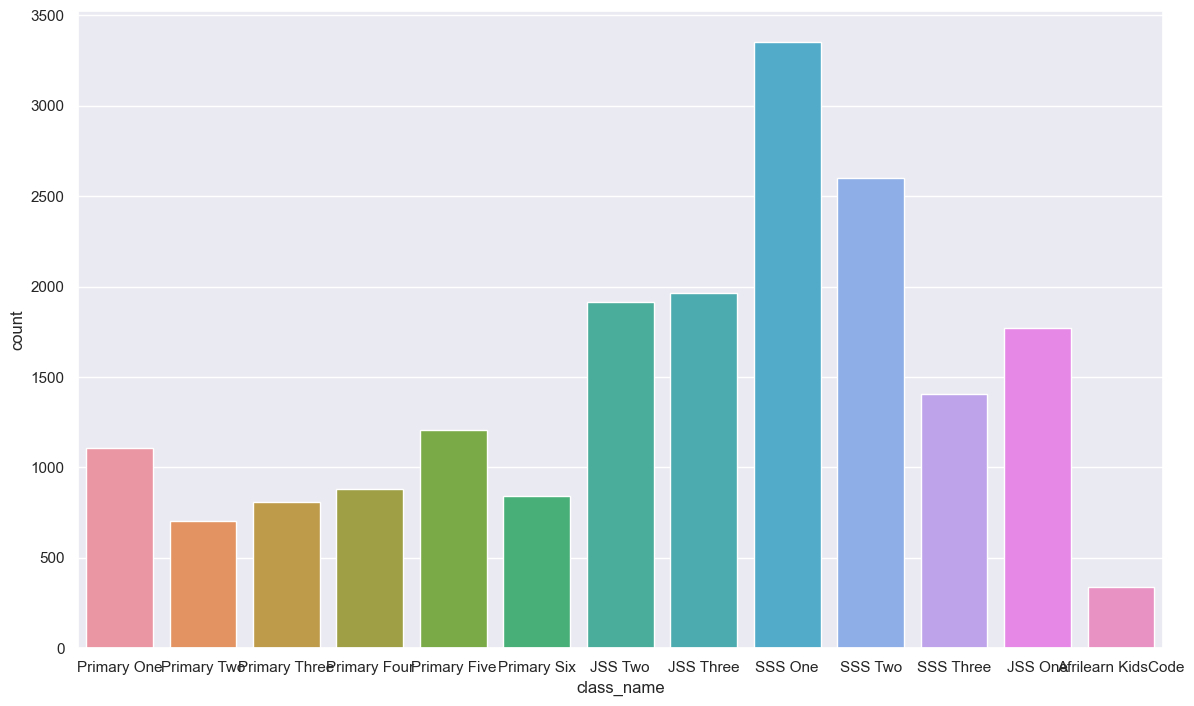

In [240]:
sns.countplot(data=old_df_with_classes,x='class_name')

In [241]:
old_df.to_csv("all_question_withclean.csv",index=[0])

In [242]:
old_df_with_classes.to_csv("all_question_withclean_class.csv")

In [247]:
pd.DataFrame({'process later':process_later,'lessonId':lessonid_later}).to_csv("process_later.csv")